In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Churn.csv')

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [ ]:
#Converting categorical values to nominal values using LabelEncoder

In [5]:
le=LabelEncoder()
df['gender'] = le.fit_transform(df.gender)
df['Partner']= le.fit_transform(df.Partner)
df['Dependents']= le.fit_transform(df.Dependents)
df['PhoneService']= le.fit_transform(df.PhoneService)
df['MultipleLines']= le.fit_transform(df.MultipleLines)
df['InternetService']= le.fit_transform(df.InternetService)
df['OnlineSecurity']= le.fit_transform(df.OnlineSecurity)
df['Partner']= le.fit_transform(df.Partner)
df['OnlineBackup']= le.fit_transform(df.OnlineBackup)
df['DeviceProtection']= le.fit_transform(df.DeviceProtection)
df['TechSupport']= le.fit_transform(df.TechSupport)
df['StreamingTV']= le.fit_transform(df.StreamingTV)
df['StreamingMovies']= le.fit_transform(df.StreamingMovies)
df['Contract']= le.fit_transform(df.Contract)
df['PaperlessBilling']= le.fit_transform(df.PaperlessBilling)
df['PaymentMethod']= le.fit_transform(df.PaymentMethod)
df['Churn']= le.fit_transform(df.Churn)

In [6]:
df=df.drop(labels='customerID',axis=1)
tc=df['TotalCharges'].values
print(tc)
tc=pd.to_numeric(tc, errors='coerce')
df=df.drop(labels='TotalCharges',axis=1)
df['TotalCharges']=pd.DataFrame(tc)
print(df)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity 

In [7]:
df=df.dropna()

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(df)

PCA(n_components=2)

In [11]:
x_pca = pca.transform(df)

In [12]:
x_pca.shape

(7032, 2)

Text(0, 0.5, 'Second Principal Component')

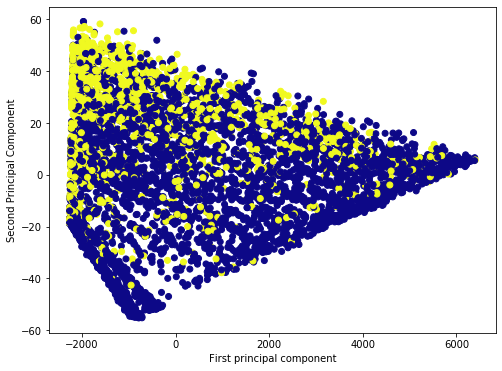

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Churn'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [14]:
pca.components_

array([[ 1.03136062e-08,  1.66645057e-05,  7.03365914e-05,
         1.30501532e-05,  8.94215399e-03,  1.47358628e-05,
         1.89652604e-04, -5.71435345e-05,  9.65287346e-05,
         1.45848257e-04,  1.51059146e-04,  1.05242031e-04,
         1.53270216e-04,  1.55480615e-04,  1.65449237e-04,
         3.42133128e-05, -1.55679945e-04,  8.64116338e-03,
        -3.88717465e-05,  9.99922575e-01],
       [-3.42057050e-04,  2.87207903e-03, -3.38778510e-03,
        -3.91351634e-03, -4.41959421e-01,  2.65178656e-03,
         6.17388938e-03, -8.06093418e-03, -9.86508472e-03,
        -5.67282805e-03, -4.17147785e-03, -8.43159759e-03,
         3.62012961e-03,  3.40404274e-03, -1.75113618e-02,
         6.33599433e-03,  2.84083672e-03,  8.96580825e-01,
         7.58180979e-03, -3.79152439e-03]])

In [15]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)

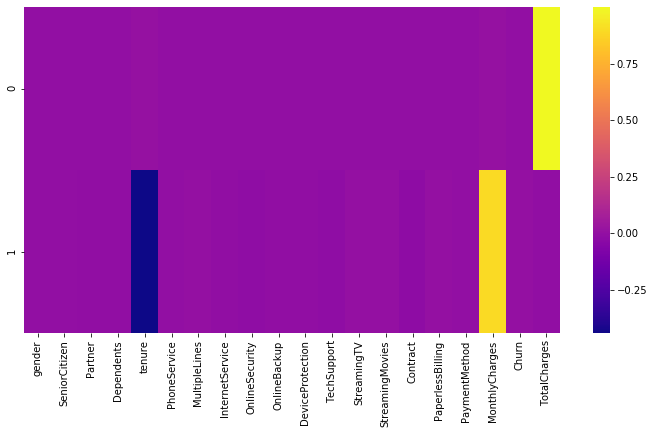

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [17]:
pca.explained_variance_ratio_
data=df.values


In [18]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( data[:,:-1], data[:,-2], test_size=0.42, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [20]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [21]:
pca.fit(train_img)

PCA(n_components=0.95)

In [22]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [25]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

In [26]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([0.])

In [27]:
predictions=logisticRegr.predict(test_img[0:2954])

In [28]:
logisticRegr.score(test_img, test_lbl)

1.0

In [29]:
test_lbl[:10]

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(test_lbl,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2167
         1.0       1.00      1.00      1.00       787

    accuracy                           1.00      2954
   macro avg       1.00      1.00      1.00      2954
weighted avg       1.00      1.00      1.00      2954

